# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

In [145]:
df = pd.read_csv("datasets/cancer_EUA.csv",sep=";",decimal=",")


2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

In [146]:
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0        890.770529             164.9          489.8    61898.0   
1        173.0        669.088363             161.3          411.6    48127.0   
2        102.0        744.083462             174.7          349.7    49348.0   
3        427.0        953.773339             194.8          430.4    44243.0   
4         57.0        646.194438             144.4          350.1    49955.0   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0    260131.0            11.2   499.748204   (61494.5, 125635]       39.3   
1     43269.0            18.6    23.111234  (48021.6, 51046.4]       33.0   
2     21026.0            14.6    47.560164  (48021.6, 51046.4]       45.0   
3     75882.0            17.1   342.637253    (42724.4, 45201]       42.8   
4     10321.0            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [148]:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [149]:
# vamos agora identificar as features que possuem valores nulos e sua quantidade
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [150]:
# como as features PctSomeCol18_24, PctEmployed16_Over,PctPrivateCoverageAlone que possuem valores "0" já foram descartados de nosso dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

In [151]:
# Vamos identificar so valroes de media, varincia e mediana entre outras medidas:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

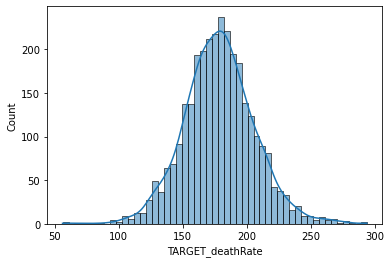

In [152]:
# Vamos identificar a distribuição da variável target, 
sns.histplot(data=df, x="TARGET_deathRate", kde=True);

# Identificando se existe algum outlier, vamos usar o scatter plot:


In [153]:
#Cálculo da média do Taget:
df["TARGET_deathRate"].mean()

178.49100754840853

In [154]:
#Cálculo da Variancia
df["TARGET_deathRate"].std()

27.62979667585202

In [155]:
#Cálculo da mediana
df["TARGET_deathRate"].median()

178.1

In [156]:
# Podmeos observar que como a média e a mdiana estão praticamente juntos, a curva pode ser considerada um normal, sem vies, 
#o que fornece mais segurança aos achados que são baseados na normalidade dos dados

In [157]:
# Vamos confirmar a afirmação acima calculando o "skewness"
df["TARGET_deathRate"].skew()

0.12931340277335948

In [158]:
# Com este valor de"skewness" muito bixo a nossa consideração foi comprovada.''

In [159]:
# Vamos agora verificar a  correlação das features para poder identificar a feature que iremos escolher 
#para a regressão linear simples e para a fácil identificação já vamos classifica-la descendentemente:
correlacao = df.corr(method='spearman')
corr_y = correlacao['TARGET_deathRate'].abs().sort_values(ascending=False)
corr_y

TARGET_deathRate           1.000000
avgDeathsPerYear           0.672511
PctBachDeg25_Over          0.501730
medIncome                  0.463858
PctPublicCoverageAlone     0.453102
povertyPercent             0.442435
PctEmployed16_Over         0.433174
PctHS25_Over               0.420579
PctPrivateCoverage         0.411319
incidenceRate              0.407906
PctUnemployed16_Over       0.402940
PctPublicCoverage          0.402365
PctPrivateCoverageAlone    0.380840
PctMarriedHouseholds       0.279620
PctEmpPrivCoverage         0.277938
PctHS18_24                 0.275896
PctBachDeg18_24            0.270316
PercentMarried             0.257257
PctBlack                   0.251542
PctOtherRace               0.216924
PctSomeCol18_24            0.212383
PctAsian                   0.207830
PctNoHS18_24               0.124543
studyPerCap                0.112687
PctWhite                   0.101955
avgAnnCount                0.085583
BirthRate                  0.050487
popEst2015                 0

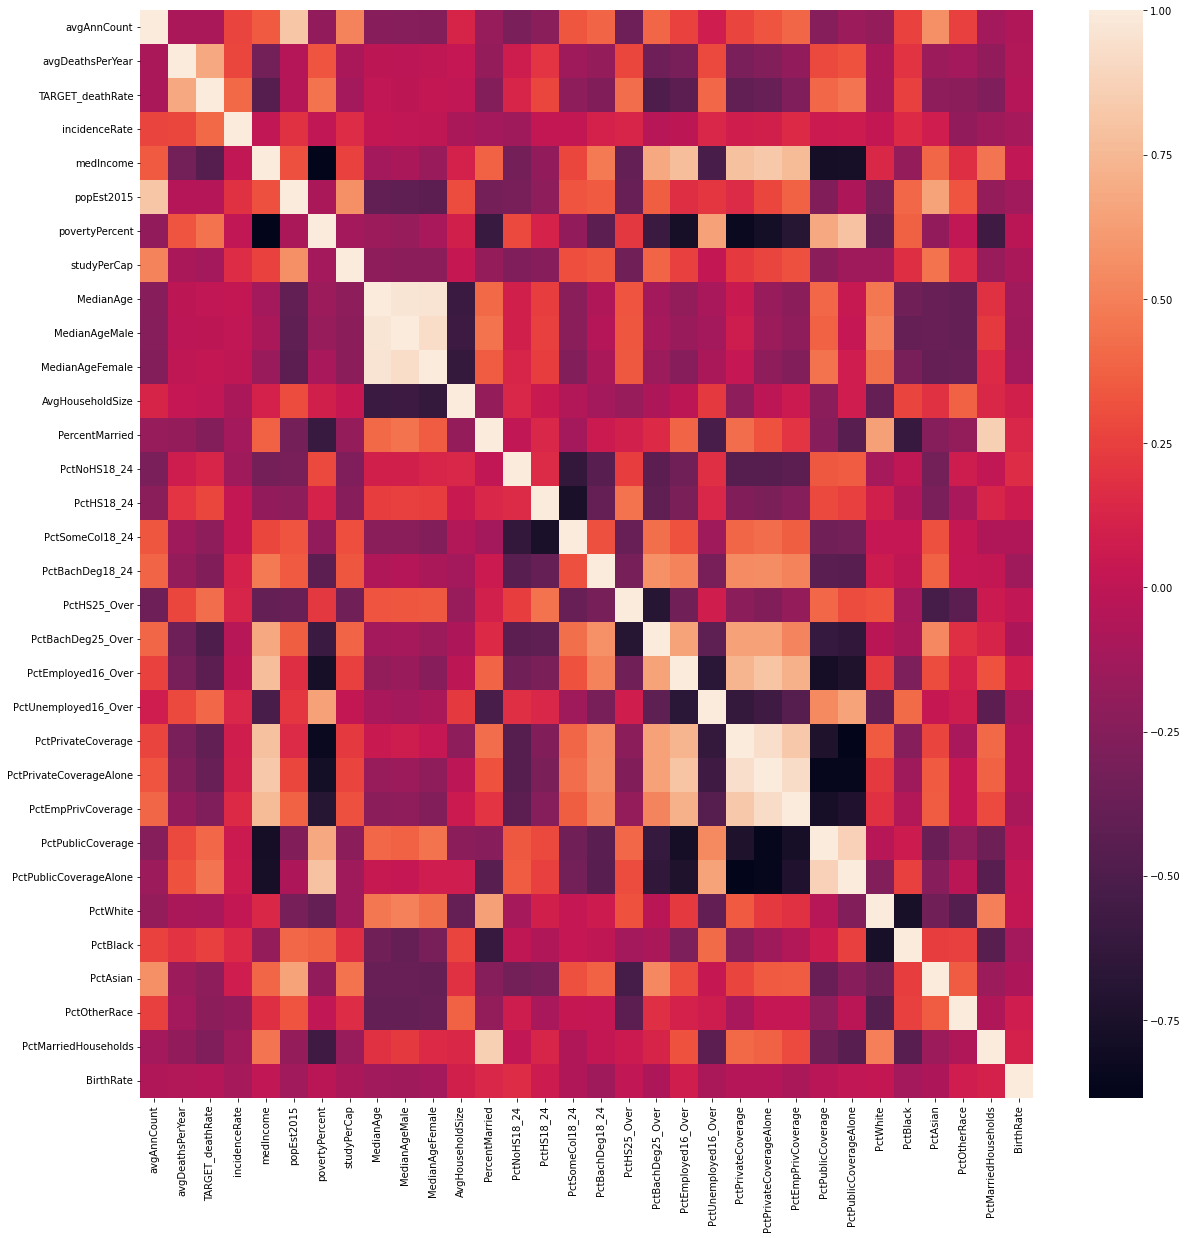

In [160]:
# para melhor visualização utilizaremo o "heatmap"

plt.figure(figsize=(20,20))
sns.heatmap(correlacao);

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

In [161]:
# pelas correlações incialmente levnatadas das 3 candidatas:, avgDeathsPerYear - 0.672511, PctBachDeg25_Over - 0.501730 e 
# medIncome -  0.463858, a avgDeathsPerYear está diretamente relacionada (dependente) com o numero de mortes, o que não faz
# sentido ser escolhida. Portanto, vamos nos ater as outras duas.IMportante ressaltar que a variável "PctBachDeg25_Over" 
# possui um vieis por cosiderar pessoas com educação superior e idade superior a 25 anos. Vamos fazer a exploração para as 
# duas variáveis que restaram. Inicialmente veremos se há valores fora do padrão, com o sactterplot:


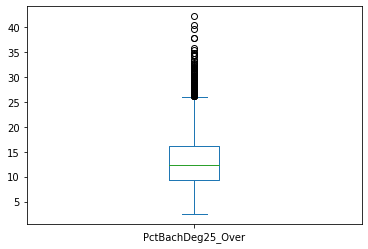

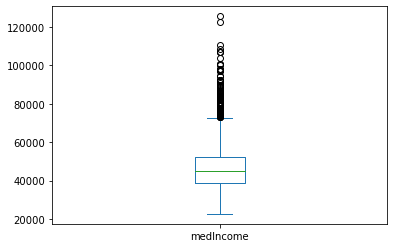

In [202]:
ax1 = df.plot(y='PctBachDeg25_Over', kind='box')
ax2 = df.plot(y='medIncome', kind='box')

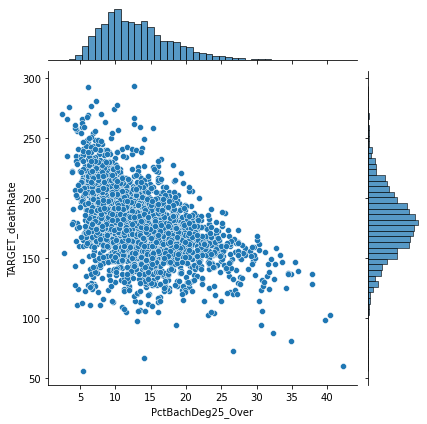

In [162]:
sns.jointplot(data=df, x='PctBachDeg25_Over',y='TARGET_deathRate');

In [163]:
# pelo gráfico parece que existem 4 pontos que poderiam estar fora do padrão:
df[df['TARGET_deathRate']<73]['TARGET_deathRate']

1093    59.7
1220    72.0
1489    56.0
1941    66.3
Name: TARGET_deathRate, dtype: float64

In [164]:
#  removendi os outliers
df = df[~(df['TARGET_deathRate']<73)]


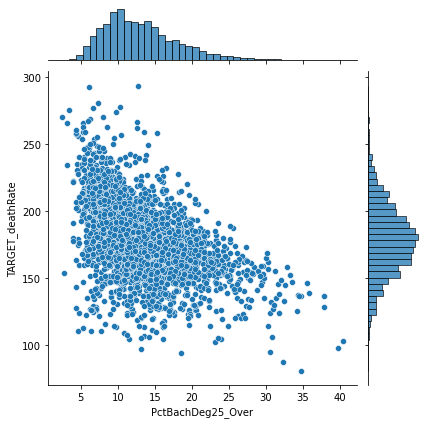

In [165]:
# verificando se os outliers sumiram:
sns.jointplot(data=df, x='PctBachDeg25_Over',y='TARGET_deathRate');

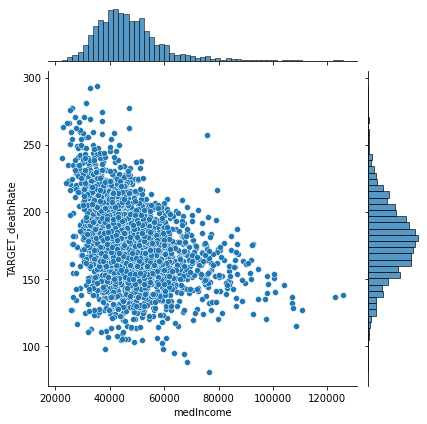

In [166]:
# Fazendo a mesma análise para a feature "medIncome"
sns.jointplot(data=df, x='medIncome',y='TARGET_deathRate');

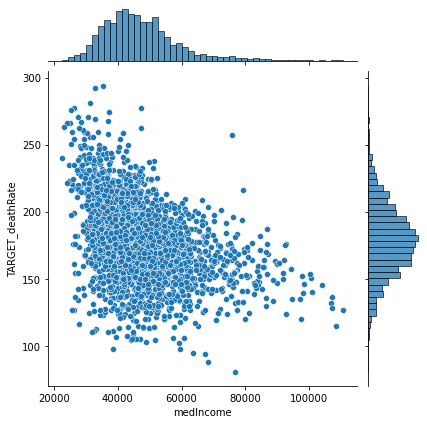

In [167]:
# Parece que os valores acima de 120.000 poderiam ser um outlier, vamos retirá-lo
df = df[~(df['medIncome']>120000)]
sns.jointplot(data=df, x='medIncome',y='TARGET_deathRate');

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

In [168]:
# treinamento do modelo para a primeira variavel "PctBachDeg25_Over"
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

O coeficiente linear é 211.84216740309324
O coeficiente angular é -2.504823180992674
---------------------------------------------------------------------------------------------------------------------



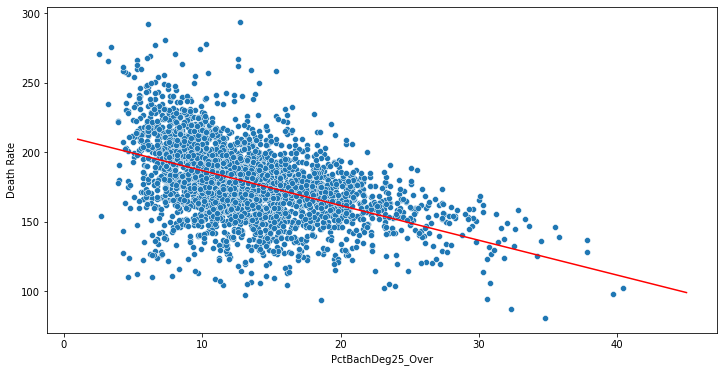

---------------------------------------------------------------------------------------------------------------------



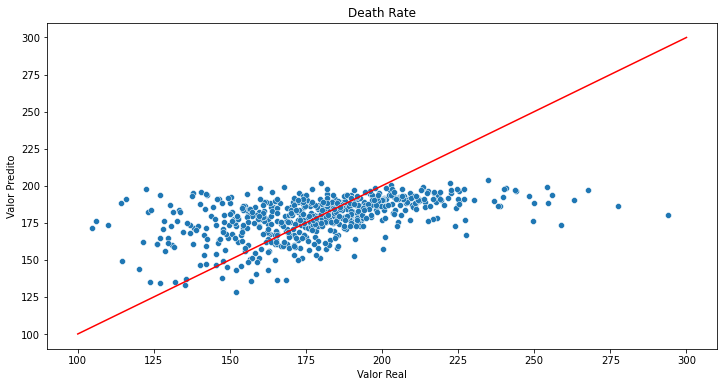

---------------------------------------------------------------------------------------------------------------------

Métricas de Teste

R^2: 0.235715607685957
MAE: 17.401850452160268
MSE: 561.843211681888
RMSE: 23.703232093575085
---------------------------------------------------------------------------------------------------------------------

Métricas Treino
R^2: 0.23818350519683607
MAE: 18.36557373030512
MSE: 570.4329202691002
RMSE: 23.883737569088726


In [169]:
#Importar
from sklearn.linear_model import LinearRegression
#Instanciar
reg_lin = LinearRegression()

#Treino e teste
X = df['PctBachDeg25_Over']
Y = df['TARGET_deathRate']
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2, random_state=42)

#Treinar modelo 
reg_lin.fit(X_treino.values.reshape(-1,1),Y_treino)

#Printando coeficiente e intercepto
print(f'O coeficiente linear é {reg_lin.intercept_}')
print(f'O coeficiente angular é {reg_lin.coef_[0]}')

print('---------------------------------------------------------------------------------------------------------------------\n')
#Plot do modelo treinado
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=df['PctBachDeg25_Over'], y=df['TARGET_deathRate'])
x = np.linspace(1, 45, 10000)
y = reg_lin.intercept_ + reg_lin.coef_*x
plt.plot(x, y, color="red")
plt.xlabel('PctBachDeg25_Over')
plt.ylabel('Death Rate')
plt.show()
# Previsão de Y com dados de teste
Y_pred = reg_lin.predict(X_teste.values.reshape(-1,1))
print('---------------------------------------------------------------------------------------------------------------------\n')
#Plot do Predito pelo real
plt.figure(figsize=(12, 6))
x = np.linspace(100,300, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_teste, y=Y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
#Métricas
from sklearn import metrics
print('Métricas de Teste')
print('\nR^2:', metrics.r2_score(Y_teste,Y_pred))
print('MAE:', metrics.mean_absolute_error(Y_teste,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_teste,Y_pred))
print('RMSE:', metrics.mean_squared_error(Y_teste,Y_pred,squared=False))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Métricas Treino')
preditos_treino = reg_lin.predict(X_treino.values.reshape(-1,1))
print('R^2:', metrics.r2_score(Y_treino, preditos_treino))
print('MAE:', metrics.mean_absolute_error(Y_treino, preditos_treino))
print('MSE:', metrics.mean_squared_error(Y_treino, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treino, preditos_treino)))

O coeficiente linear é 225.486115378564
O coeficiente angular é -0.0009948669424465735
---------------------------------------------------------------------------------------------------------------------



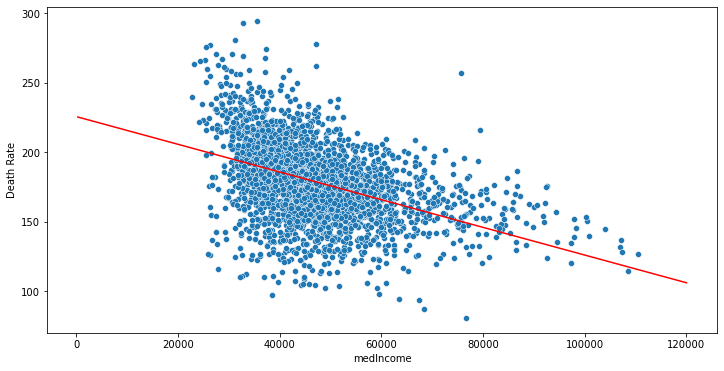

---------------------------------------------------------------------------------------------------------------------



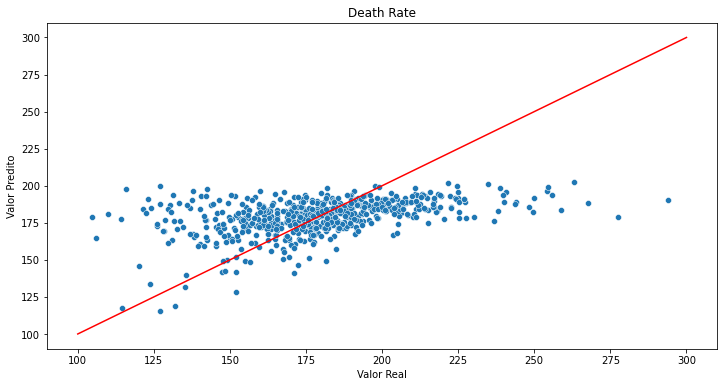

---------------------------------------------------------------------------------------------------------------------

Métricas de Teste

R^2: 0.2064087295071534
MAE: 17.80026542829564
MSE: 583.3873786515873
RMSE: 24.153413395451732
---------------------------------------------------------------------------------------------------------------------

Métricas Treino
R^2: 0.1852556954907787
MAE: 19.008206230920965
MSE: 610.0642032093238
RMSE: 24.69947779223933


In [170]:
# Agora faermos o mesmo para a feature "medIncome"

#Importar
from sklearn.linear_model import LinearRegression
#Instanciar
reg_lin = LinearRegression()

#Treino e teste
X = df['medIncome']
Y = df['TARGET_deathRate']
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2, random_state=42)

#Treinar modelo 
reg_lin.fit(X_treino.values.reshape(-1,1),Y_treino)

#Printando coeficiente e intercepto
print(f'O coeficiente linear é {reg_lin.intercept_}')
print(f'O coeficiente angular é {reg_lin.coef_[0]}')

print('---------------------------------------------------------------------------------------------------------------------\n')
#Plot do modelo treinado
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x=df['medIncome'], y=df['TARGET_deathRate'])
x = np.linspace(250, 120000, 10000)
y = reg_lin.intercept_ + reg_lin.coef_*x
plt.plot(x, y, color="red")
plt.xlabel('medIncome')
plt.ylabel('Death Rate')
plt.show()
# Previsão de Y com dados de teste
Y_pred = reg_lin.predict(X_teste.values.reshape(-1,1))
print('---------------------------------------------------------------------------------------------------------------------\n')
#Plot do Predito pelo real
plt.figure(figsize=(12, 6))
x = np.linspace(100,300, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_teste, y=Y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
#Métricas
from sklearn import metrics
print('Métricas de Teste')
print('\nR^2:', metrics.r2_score(Y_teste,Y_pred))
print('MAE:', metrics.mean_absolute_error(Y_teste,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_teste,Y_pred))
print('RMSE:', metrics.mean_squared_error(Y_teste,Y_pred,squared=False))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Métricas Treino')
preditos_treino = reg_lin.predict(X_treino.values.reshape(-1,1))
print('R^2:', metrics.r2_score(Y_treino, preditos_treino))
print('MAE:', metrics.mean_absolute_error(Y_treino, preditos_treino))
print('MSE:', metrics.mean_squared_error(Y_treino, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treino, preditos_treino)))

texto em itálico    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?
Regressão Multipla:

In [174]:
# Verificando novamente os dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   float64
 2   TARGET_deathRate        3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   float64
 5   popEst2015              3047 non-null   float64
 6   povertyPercent          3047 non-null   float64
 7   studyPerCap             3047 non-null   float64
 8   binnedInc               3047 non-null   object 
 9   MedianAge               3047 non-null   float64
 10  MedianAgeMale           3047 non-null   float64
 11  MedianAgeFemale         3047 non-null   float64
 12  Geography               3047 non-null   object 
 13  AvgHouseholdSize        3047 non-null   float64
 14  PercentMarried          3047 non-null   

In [175]:
# Selecionar somente as features numéricas
df.select_dtypes(include=[np.number]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avgAnnCount             3047 non-null   float64
 1   avgDeathsPerYear        3047 non-null   float64
 2   TARGET_deathRate        3047 non-null   float64
 3   incidenceRate           3047 non-null   float64
 4   medIncome               3047 non-null   float64
 5   popEst2015              3047 non-null   float64
 6   povertyPercent          3047 non-null   float64
 7   studyPerCap             3047 non-null   float64
 8   MedianAge               3047 non-null   float64
 9   MedianAgeMale           3047 non-null   float64
 10  MedianAgeFemale         3047 non-null   float64
 11  AvgHouseholdSize        3047 non-null   float64
 12  PercentMarried          3047 non-null   float64
 13  PctNoHS18_24            3047 non-null   float64
 14  PctHS18_24              3047 non-null   

In [176]:
# Verificar ocorrência de valores nulos
df.select_dtypes(include=[np.number]).isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [177]:
# selecione todas as outras colunas numéricas como a variável de features X

df = df.select_dtypes(include=[np.number])
df = df.dropna(axis='columns', how='any')

In [178]:
# Verificando novamente a ocorrência de valores nulos
df.isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [179]:
# Criando o X e o y
X = df.drop(columns=['TARGET_deathRate'])
y = df['TARGET_deathRate']

In [180]:
# Nomes das features
X.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [181]:
# Shape de X
X.shape

(3047, 28)

Intercepto: 94.64871979977958
Coeficientes angulares: [-8.34658060e-04  8.84565193e-02  9.99306821e-02  1.36165312e-04
  2.34244954e-06  2.11992097e-01 -6.66837029e-05 -4.07885180e-03
 -9.48468721e-01  3.55222112e-01 -1.37670514e-01  8.60854068e-01
 -1.08456636e-01  1.54084811e-01 -8.37983049e-02  3.52213497e-01
 -8.79124035e-01  4.26105616e-01 -4.62179774e-01  3.00901991e-01
  2.80578331e-01 -1.69770237e-01 -7.19275514e-02 -8.05690500e-02
 -1.19514973e-03 -7.75701415e-01 -1.00262573e+00 -6.00388516e-01]

####################################################



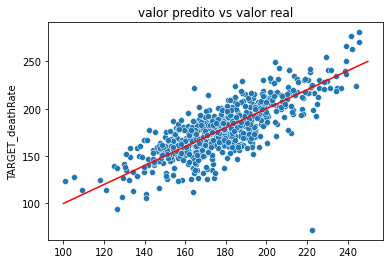

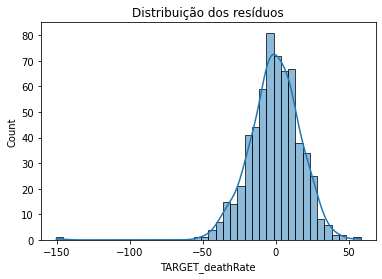


####################################################


Métricas de avaliação (dados de teste):

R^2: 0.6150259610578983
MAE: 13.376857989983682
MSE: 314.01659980363337
RMSE: 17.720513531036097


In [188]:
# Etapas da modelagem

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino,y_treino)

print("Intercepto:", modelo.intercept_ )
print("Coeficientes angulares:",modelo.coef_ )

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)


plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.plot(np.linspace(100, 250, 1000), np.linspace(100, 250, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_teste, predictions))
print('MAE:', metrics.mean_absolute_error(y_teste, predictions))
print('MSE:', metrics.mean_squared_error(y_teste, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predictions)))

O coeficiente linear é 129.30495544089806
Os coeficiente angulares são [-2.08322305e+01  9.99798680e+01  1.00490294e+02  1.40243463e+01
  1.22683148e+01  9.37005067e+00 -6.50986913e-01 -2.43466664e+00
 -4.01202269e+01  1.54166397e+01 -5.43509421e-01  4.25261909e+01
 -6.95207040e+00  1.11095149e+01 -4.34075219e+00  1.66596984e+01
 -3.47253994e+01  1.23570629e+01 -3.23525842e+01  1.72115939e+01
  1.51231721e+01 -7.46989045e+00 -6.45915489e+00 -6.92473248e+00
 -4.44080968e-02 -3.25253554e+01 -4.88384676e+01 -1.28039845e+01]




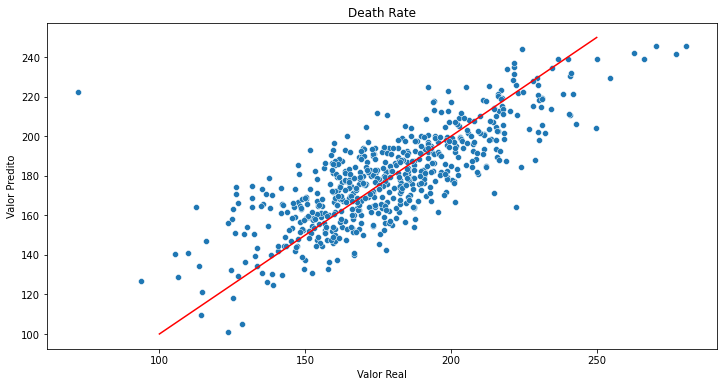

---------------------------------------------------------------------------------------------------------------------



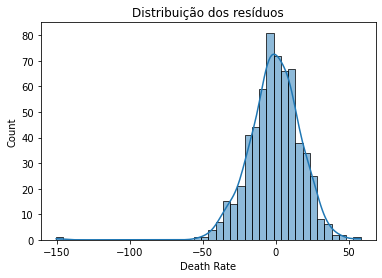

---------------------------------------------------------------------------------------------------------------------

Métricas Teste
R^2: 0.6150259610578988
MAE: 13.376857989983444
MSE: 314.016599803633
RMSE: 17.720513531036087
---------------------------------------------------------------------------------------------------------------------

Métricas Treino
R^2: 0.636417674441395
MAE: 12.10276031766292
MSE: 272.68919924953593
RMSE: 16.513303704877952


In [199]:
## Regressão Linear Múltipla com Min-Max Scale
X = df.drop(columns=['TARGET_deathRate'])
Y = df['TARGET_deathRate']
# 1)
from sklearn.linear_model import LinearRegression
# 2)
estimador = LinearRegression()
# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state = 42)

#Aplicando mms
from sklearn.preprocessing import MinMaxScaler
#usamos o minmax pra que todas as features
# tenham o mesmo intervalo no espaço amostral - (0, 1)
mms = MinMaxScaler()
# agora, vamos FITAR o scaler COM OS DADOS DE TREINO
mms.fit(X_treino)
# transformando os dados
X_treino = mms.transform(X_treino)
X_teste = mms.transform(X_teste)

X_treino = mms.fit_transform(X_treino)
X_teste = mms.transform(X_teste)

# 4)
modelo = estimador.fit(X_treino,Y_treino)

print(f'O coeficiente linear é {modelo.intercept_}')
print(f'Os coeficiente angulares são {modelo.coef_}')
print('\n')

prediction = modelo.predict(X_teste)
plt.figure(figsize=(12, 6))
x = np.linspace(100, 250, 1000)
y = x
plt.plot(x,y,color='red')
sns.scatterplot(x=Y_teste, y=prediction)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
plt.title("Distribuição dos resíduos")
sns.histplot(Y_teste-prediction, kde=True)
plt.xlabel('Death Rate')
plt.show()
print('---------------------------------------------------------------------------------------------------------------------\n')
from sklearn import metrics
print('Métricas Teste')
print('R^2:', metrics.r2_score(Y_teste, prediction))
print('MAE:', metrics.mean_absolute_error(Y_teste, prediction))
print('MSE:', metrics.mean_squared_error(Y_teste, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_teste, prediction)))
print('---------------------------------------------------------------------------------------------------------------------\n')
print('Métricas Treino')
preditos_treino = modelo.predict(X_treino)
print('R^2:', metrics.r2_score(Y_treino, preditos_treino))
print('MAE:', metrics.mean_absolute_error(Y_treino, preditos_treino))
print('MSE:', metrics.mean_squared_error(Y_treino, preditos_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_treino, preditos_treino)))

In [200]:
coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Parameter value'])

coeff_df.abs().sort_values(by='Parameter value',ascending=False)

Parameter value
incidenceRate                100.490294
avgDeathsPerYear              99.979868
PctMarriedHouseholds          48.838468
PercentMarried                42.526191
MedianAgeMale                 40.120227
PctBachDeg25_Over             34.725399
PctOtherRace                  32.525355
PctPrivateCoverage            32.352584
avgAnnCount                   20.832231
PctEmpPrivCoverage            17.211594
PctHS25_Over                  16.659698
MedianAgeFemale               15.416640
PctPublicCoverage             15.123172
medIncome                     14.024346
BirthRate                     12.803984
PctUnemployed16_Over          12.357063
popEst2015                    12.268315
PctHS18_24                    11.109515
povertyPercent                 9.370051
PctPublicCoverageAlone         7.469890
PctNoHS18_24                   6.952070
PctBlack                       6.924732
PctWhite                       6.459155
PctBachDeg18_24                4.340752
MedianAge                      2.434667
studyPerCap                    0.650987
AvgHouseholdSize               0.543509
PctAsian                       0.044408

5. Compare os três modelos desenvolvidos.
Regressão Linear
- a regressão com a feaure PctBachDeg25_Over possui um R2 (R2=0,2318) melhor do que a feature medIncome (R2=0,1852) e os valores de MAE, MSE e RMSE também são melhores quando comparadas entre treino e teste
- Porém como retiramos do DF algun poucos pontos, talvez este resultado tenha sido piorado
- O modelo de regressão múltipla se mostroo melhor com R2 = 0,615 , naõ diferindo significativamente entre o normal e o normalizado (MIn-Max Scale) assim como os outros valores de MAE,MSE e RMSE são menores ( portanto melhores) que o da Regressão Linear com somente uma variável
- POdemos verificar que os maiores coeficientes da regressão multivariável são, em ordem decrescente, os relativos as features incidenceRate, PctMarriedHouseholds,PercentMarried, MedianAgeMale e  PctBachDeg25_Over. Talvez devessemos analisar a Regressão Linear com a variável incidenceRate para verificar se haverá uma melhora nos resultados



